<a href="https://colab.research.google.com/github/jrakhshanda55/Ausaf_ML/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction: A Multivariate Analysis

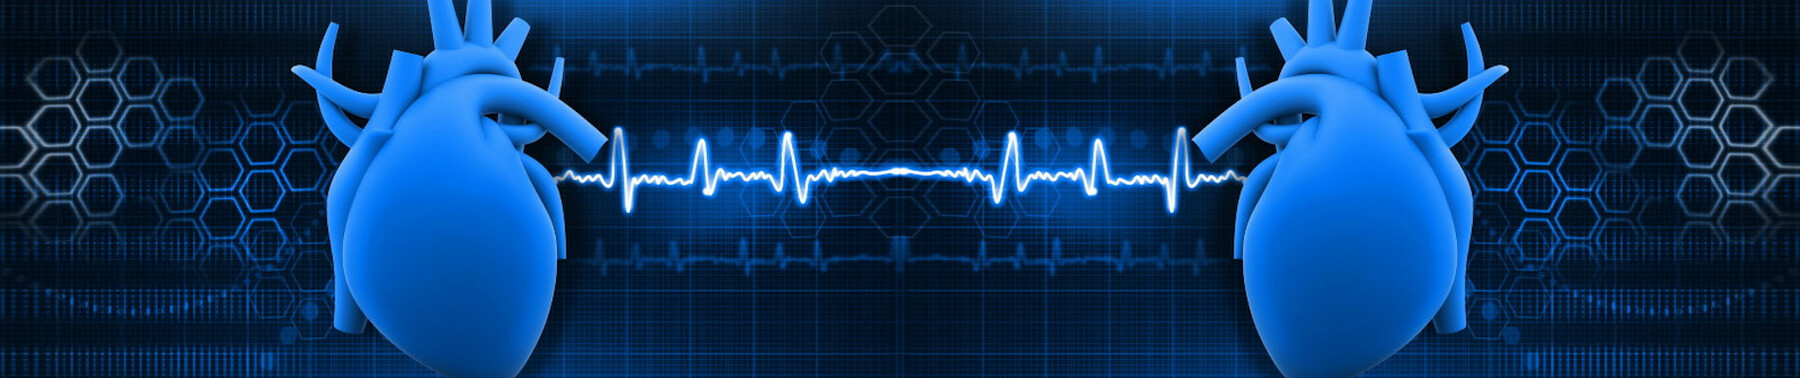

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
sns.set(style="whitegrid")

## 1. Introduction

Cardiovascular diseases (CVDs) remain the leading global cause of mortality, claiming approximately 17.9 million lives annually—constituting 31% of all deaths worldwide. Four out of five CVD-related fatalities result from heart attacks and strokes, with one-third occurring prematurely in individuals under 70 years of age. Heart failure, a common consequence of CVDs, emphasizes the urgency for early detection and management.

Individuals affected by CVDs or at high risk—due to factors such as hypertension, diabetes, hyperlipidemia, or existing diseases—require timely identification and intervention. In this context, the application of machine learning models proves instrumental.

This project aims to leverage machine learning methodologies to predict the presence of heart disease based on patient attributes. The exploration goes beyond predictive modeling; it extends to extracting meaningful insights from the dataset. Through a comprehensive analysis, we aim to identify key correlations and factors influencing heart health. This dual-purpose approach not only enhances our predictive capabilities but also contributes to a deeper understanding of the intricate dynamics associated with cardiovascular well-being.

### 1.1 Objective

The primary objectives of this analysis are twofold. The first goal involves an exploratory data analysis, aiming to derive meaningful insights and diagnostic correlations from the dataset. By leveraging statistical and machine learning techniques, the intention is to unravel patterns that could enhance our understanding of cardiovascular health, potentially leading to more effective diagnostic procedures and preventive measures.

The second objective is to develop a machine learning model capable of predicting the likelihood of heart disease based on the provided attributes. This task involves applying classification algorithms to discern patterns and relationships within the dataset, contributing to the broader field of medical diagnostics.


# 2. Dataset
The Heart Disease UCI dataset, presenting a diverse array of attributes related to cardiovascular health, stands out as a valuable resource for exploration. Widely recognized in the machine learning community, this dataset comprises 11 attributes, each providing valuable insights into the cardiovascular health of patients. These attributes include age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak (ST depression induced by exercise relative to rest), and the slope of the peak exercise ST segment.

**Column Descriptions:**
- Age: age of the patient in years
- Sex: sex of the patient (M: Male, F: Female)
- ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
- RestingBP: resting blood pressure (mm Hg)
- Cholesterol: serum cholesterol (mm/dl)
- FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
- RestingECG: resting electrocardiogram results (Normal: Normal, ST: having - ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria9
- MaxHR: maximum heart rate achieved 8 numeric value between 60 and 202)
- ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
- Oldpeak: oldpeak = ST (Numeric value measured in depression)
- ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
- HeartDisease: Target Variable (1: heart disease, 0: Normal)

In [39]:
df = pd.read_csv('/content/heart.csv')
print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploratory Data Analysis (EDA)

<Figure size 1500x1000 with 0 Axes>

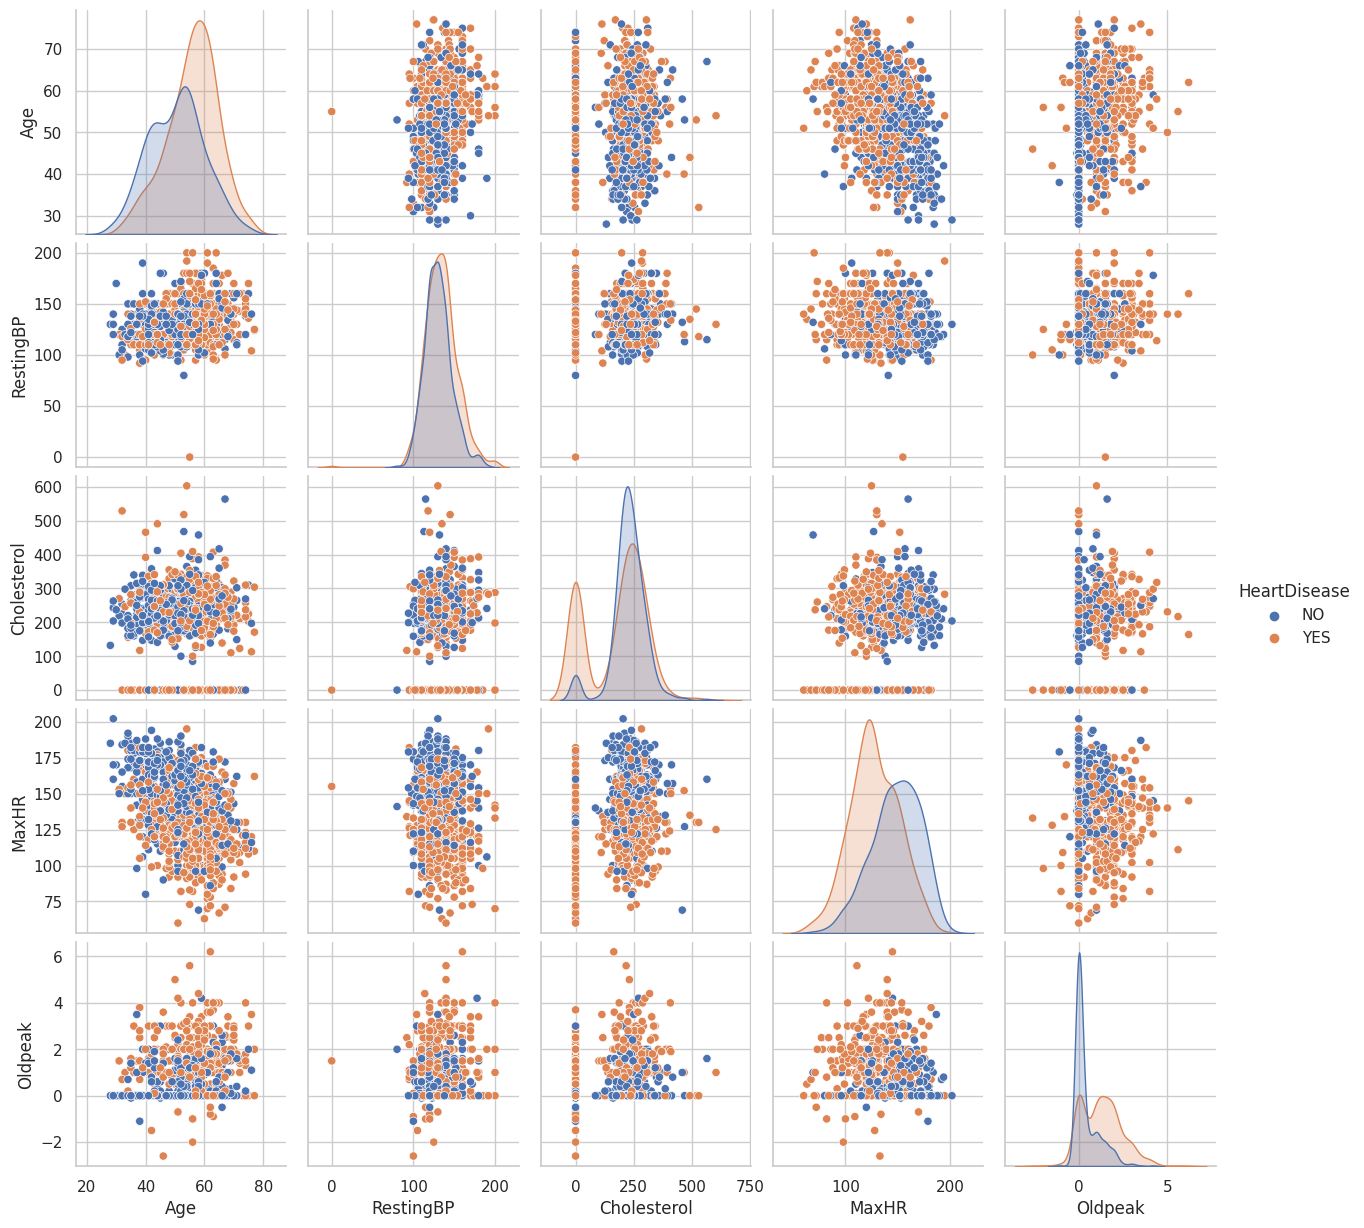

In [54]:
numerical_features = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].copy()
numerical_features['HeartDisease'] = df['HeartDisease'].replace({0: 'NO', 1: 'YES'})
plt.figure(figsize=(15, 10))
sns.pairplot(numerical_features, hue="HeartDisease")
plt.show()

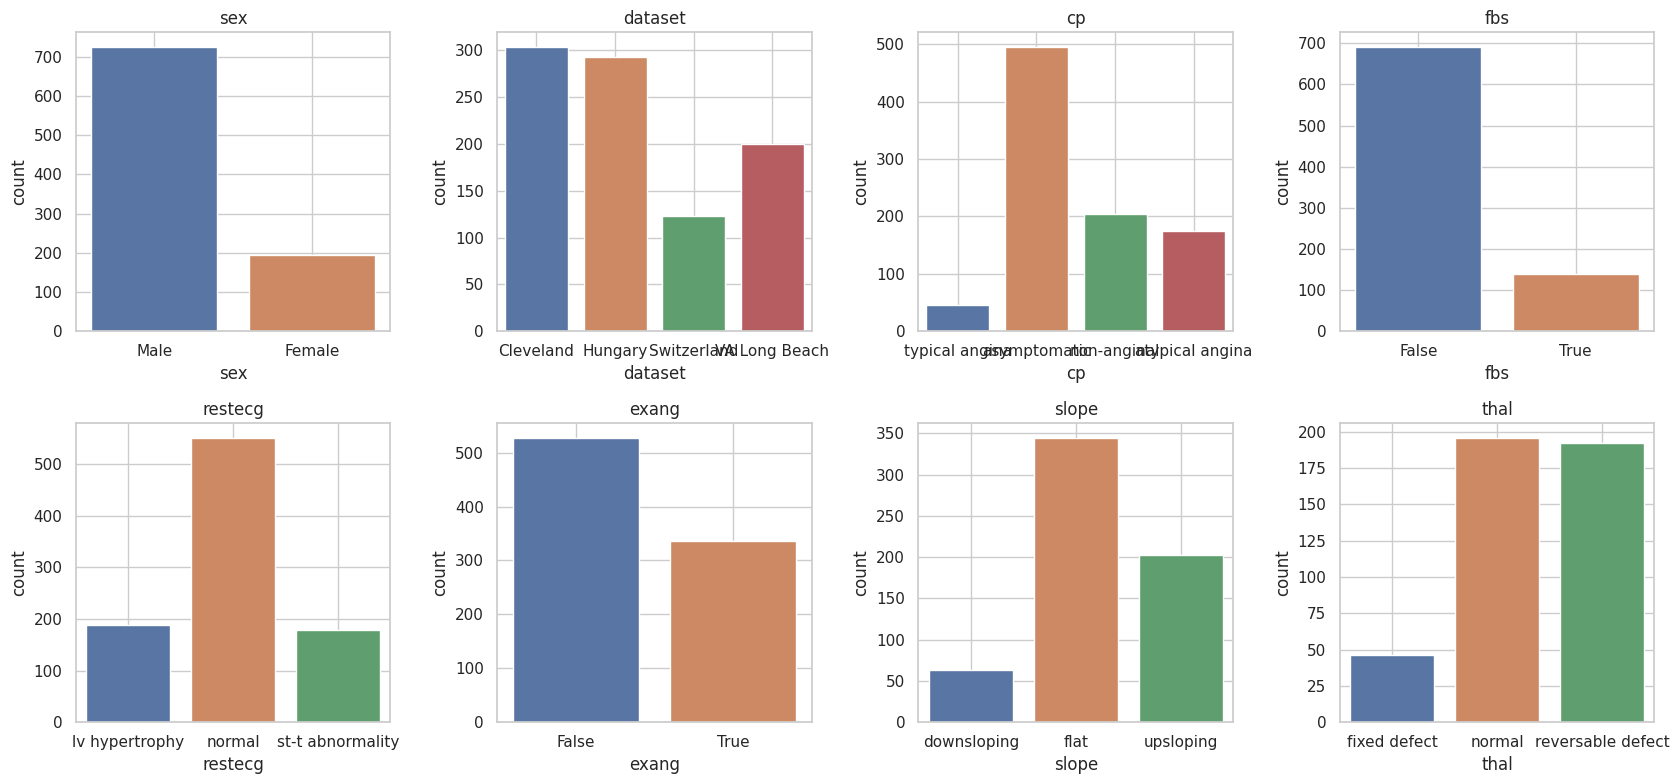

In [ ]:
# Plot categorical features
categorical_features = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(2, 4, figsize=(17, 8))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df.num.value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64